# Coverage analysis

In [20]:
import networkx as nx
import matplotlib
from matplotlib import pyplot
from statistics import median

## Load graph
Parsing GFA file manually, since GfaPy takes a strangely long amount of time reading through it.

In [21]:
# Loads the old graph
#FILENAME = "/home/marcus/PevznerLabBigData/old_graph/sheep_graph_noseq.gfa"

# Loads the new graph
FILENAME = "/home/marcus/PevznerLabBigData/20201014_graph/noseq.gfa"

# We ignore directionality for right now
graph = nx.Graph()

with open(FILENAME, "r") as gfafile:
    for line in gfafile:
        if line[0] == "S":
            parts = line.strip().split("\t")
            node_name = parts[1]
            node_len = None
            node_cov = None
            extra_data = parts[3:]
            for tag in extra_data:
                if tag.startswith("LN:i:"):
                    if node_len is None:
                        node_len = int(tag[5:])
                    else:
                        raise ValueError("Duplicate length for node {}".format(node_name))
                elif tag.startswith("dp:i:"):
                    if node_cov is None:
                        node_cov = int(tag[5:])
                    else:
                        raise ValueError("Duplicate coverage for node {}".format(node_name))
            graph.add_node(node_name, length=node_len, cov=node_cov)
        elif line[0] == "L":
            parts = line.strip().split("\t")
            src = parts[1]
            snk = parts[3]
            # Ignore directionality for just right now; this means that some links will be "repeated" (for
            # the new graph this means that the NX representation has 484 less links)
            graph.add_edge(src, snk)

print("Graph contains {} edges (represented as GFA segments).".format(graph.number_of_nodes()))
print("Graph contains {} links between edges (ignoring directionality for now).".format(graph.number_of_edges()))
print("Graph contains {} connected components.".format(nx.number_connected_components(graph)))

Graph contains 36260 edges (represented as GFA segments).
Graph contains 40545 links between edges (ignoring directionality for now).
Graph contains 8655 connected components.


## Compute coverage statstics for each component

In [22]:
# Sort components by avg coverage:
# https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html#networkx.algorithms.components.connected_components
node2len = nx.get_node_attributes(graph, "length")
node2cov = nx.get_node_attributes(graph, "cov")
sorted_components = sorted(
    nx.connected_components(graph),
    key=lambda nodeset: sum([node2cov[node] for node in nodeset]) / len(nodeset),
    reverse=True
)

cmp2totalLen = {}
cmp2meanCov = {}
cmp2medianCov = {}
cmp2cov = {}
for i, cmp in enumerate(sorted_components):
    cmp2cov[i] = [node2cov[node] for node in cmp]
    cmp2totalLen[i] = sum([node2len[node] for node in cmp])
    cmp2meanCov[i] = sum(cmp2cov[i]) / len(cmp)
    cmp2medianCov[i] = median(cmp2cov[i])
    # https://stackoverflow.com/a/10742904/10730311
    cmpNum = "{:,}".format(i + 1).ljust(6, " ")
    print("Component #{}: {} edges, total length {:,}, mean coverage {:.2f}x, median coverage {:.2f}x, has edge {}".format(
        # https://stackoverflow.com/a/59841/10730311
        cmpNum, len(cmp), cmp2totalLen[i], cmp2meanCov[i], cmp2medianCov[i], next(iter(cmp))
    ))

Component #1     : 1 edges, total length 594, mean coverage 25421.00x, median coverage 25421.00x, has edge 1010
Component #2     : 1 edges, total length 651, mean coverage 17083.00x, median coverage 17083.00x, has edge 3172
Component #3     : 1 edges, total length 679, mean coverage 9204.00x, median coverage 9204.00x, has edge 12782
Component #4     : 1 edges, total length 648, mean coverage 8864.00x, median coverage 8864.00x, has edge 836
Component #5     : 1 edges, total length 686, mean coverage 8831.00x, median coverage 8831.00x, has edge 842
Component #6     : 1 edges, total length 2,266, mean coverage 8761.00x, median coverage 8761.00x, has edge 31439
Component #7     : 1 edges, total length 2,465, mean coverage 8660.00x, median coverage 8660.00x, has edge 3175
Component #8     : 1 edges, total length 909, mean coverage 8646.00x, median coverage 8646.00x, has edge 831
Component #9     : 1 edges, total length 513, mean coverage 8524.00x, median coverage 8524.00x, has edge 833
Comp

Component #2,191 : 1 edges, total length 3,651, mean coverage 7.00x, median coverage 7.00x, has edge 16401
Component #2,192 : 1 edges, total length 742, mean coverage 7.00x, median coverage 7.00x, has edge 16431
Component #2,193 : 1 edges, total length 2,510, mean coverage 7.00x, median coverage 7.00x, has edge 16437
Component #2,194 : 1 edges, total length 22,144, mean coverage 7.00x, median coverage 7.00x, has edge 16455
Component #2,195 : 1 edges, total length 7,032, mean coverage 7.00x, median coverage 7.00x, has edge 16463
Component #2,196 : 1 edges, total length 17,868, mean coverage 7.00x, median coverage 7.00x, has edge 16543
Component #2,197 : 1 edges, total length 40,439, mean coverage 7.00x, median coverage 7.00x, has edge 16565
Component #2,198 : 1 edges, total length 10,381, mean coverage 7.00x, median coverage 7.00x, has edge 16592
Component #2,199 : 1 edges, total length 4,382, mean coverage 7.00x, median coverage 7.00x, has edge 16883
Component #2,200 : 1 edges, total l

Component #4,494 : 1 edges, total length 46,369, mean coverage 4.00x, median coverage 4.00x, has edge 11742
Component #4,495 : 1 edges, total length 30,462, mean coverage 4.00x, median coverage 4.00x, has edge 11756
Component #4,496 : 1 edges, total length 40,413, mean coverage 4.00x, median coverage 4.00x, has edge 11902
Component #4,497 : 1 edges, total length 2,334, mean coverage 4.00x, median coverage 4.00x, has edge 12030
Component #4,498 : 1 edges, total length 66,374, mean coverage 4.00x, median coverage 4.00x, has edge 12062
Component #4,499 : 1 edges, total length 39,913, mean coverage 4.00x, median coverage 4.00x, has edge 12086
Component #4,500 : 1 edges, total length 98,665, mean coverage 4.00x, median coverage 4.00x, has edge 12137
Component #4,501 : 1 edges, total length 5,416, mean coverage 4.00x, median coverage 4.00x, has edge 12156
Component #4,502 : 1 edges, total length 21,877, mean coverage 4.00x, median coverage 4.00x, has edge 12170
Component #4,503 : 1 edges, to

Component #6,664 : 1 edges, total length 53,142, mean coverage 3.00x, median coverage 3.00x, has edge 13986
Component #6,665 : 1 edges, total length 7,128, mean coverage 3.00x, median coverage 3.00x, has edge 13993
Component #6,666 : 1 edges, total length 2,520, mean coverage 3.00x, median coverage 3.00x, has edge 14007
Component #6,667 : 1 edges, total length 77,641, mean coverage 3.00x, median coverage 3.00x, has edge 14024
Component #6,668 : 1 edges, total length 169,359, mean coverage 3.00x, median coverage 3.00x, has edge 14026
Component #6,669 : 1 edges, total length 40,921, mean coverage 3.00x, median coverage 3.00x, has edge 14062
Component #6,670 : 1 edges, total length 23,047, mean coverage 3.00x, median coverage 3.00x, has edge 14068
Component #6,671 : 1 edges, total length 66,616, mean coverage 3.00x, median coverage 3.00x, has edge 14075
Component #6,672 : 1 edges, total length 13,957, mean coverage 3.00x, median coverage 3.00x, has edge 14077
Component #6,673 : 1 edges, t

## Compute entire-graph coverage statistics

In [23]:
covs = node2cov.values()
print("Minimum coverage: {}".format(min(covs)))
print("Maximum coverage: {}\n".format(max(covs)))
print("Average coverage: {:.2f}".format(sum(covs) / len(covs)))
print("Median coverage: {}".format(median(covs)))

Minimum coverage: 0
Maximum coverage: 220608

Average coverage: 139.06
Median coverage: 12.0


## Visualize histogram of average coverage by component

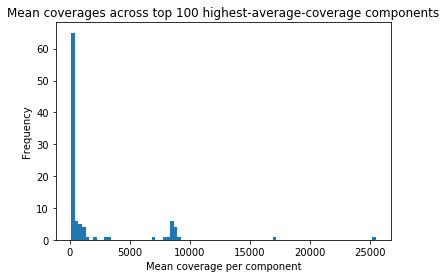

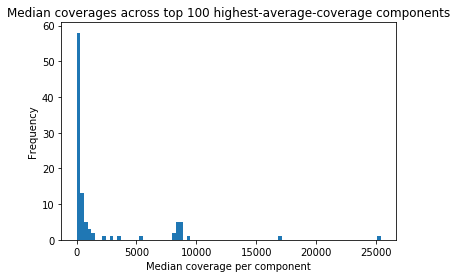

In [28]:
%matplotlib inline

pyplot.hist(x=[cmp2meanCov[c] for c in range(100)], bins="auto")
pyplot.xlabel("Mean coverage per component")
pyplot.ylabel("Frequency")
pyplot.title("Mean coverages across top 100 highest-average-coverage components")
pyplot.show()

pyplot.hist(x=[cmp2medianCov[c] for c in range(100)], bins="auto")
pyplot.xlabel("Median coverage per component")
pyplot.ylabel("Frequency")
pyplot.title("Median coverages across top 100 highest-average-coverage components")
pyplot.show()

## Visualize coverage histograms for the top $N$ components by mean coverage
Adapted from [this article](https://realpython.com/python-histograms/#visualizing-histograms-with-matplotlib-and-pandas).

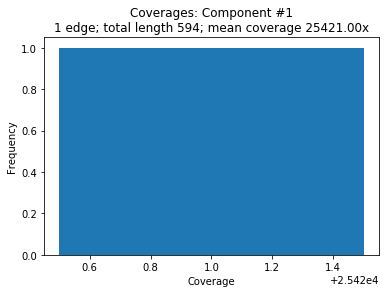

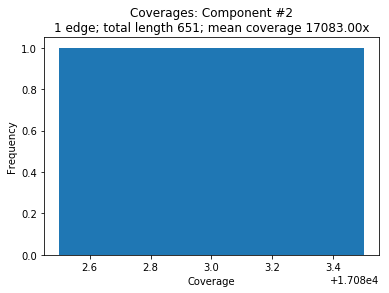

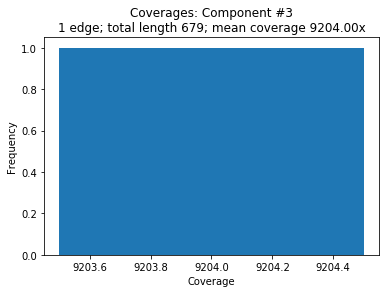

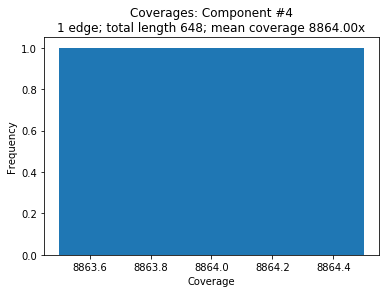

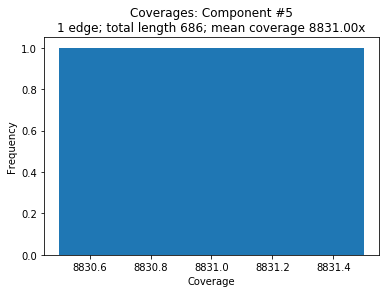

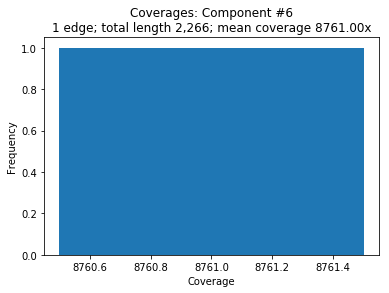

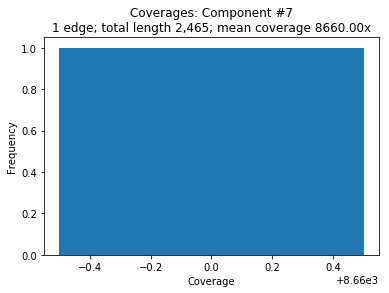

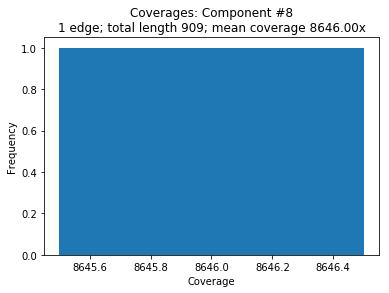

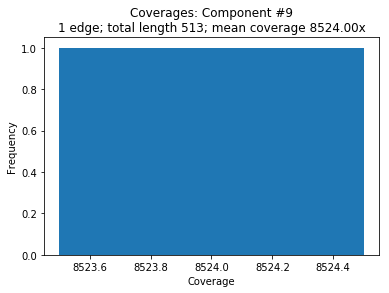

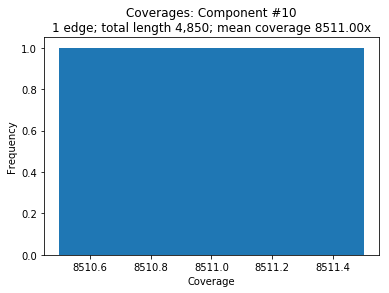

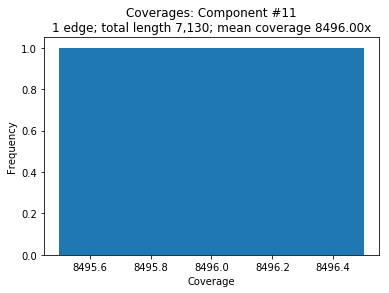

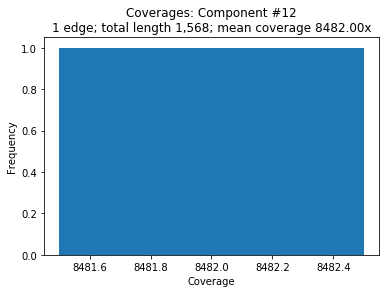

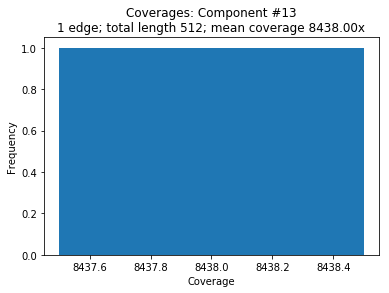

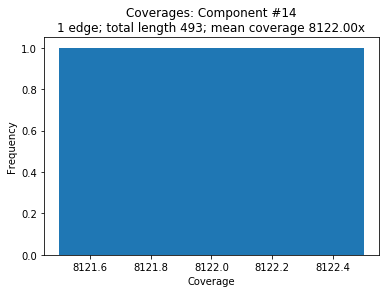

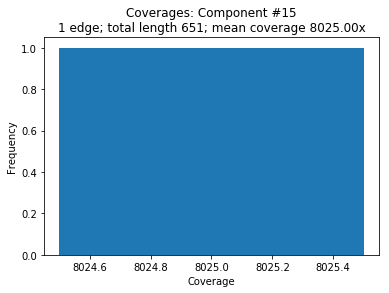

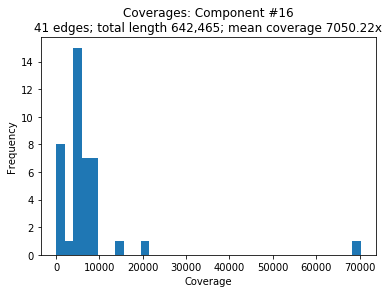

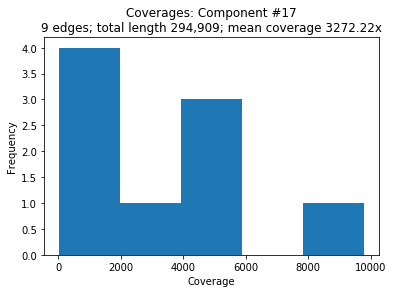

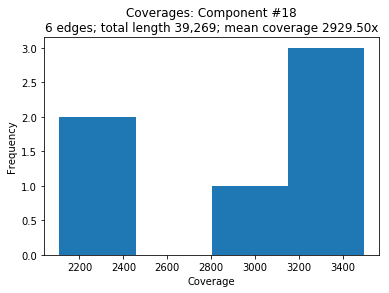

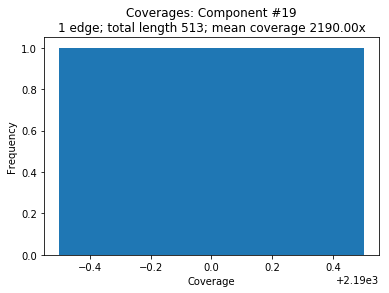

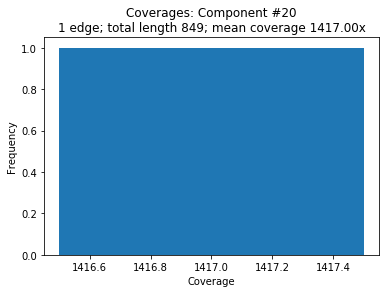

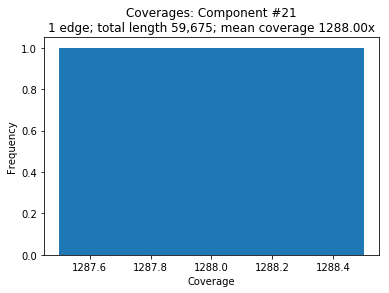

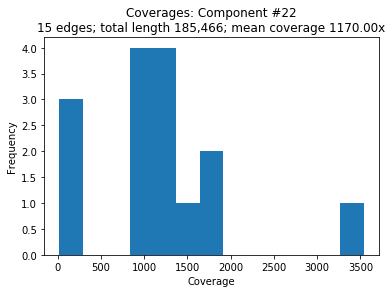

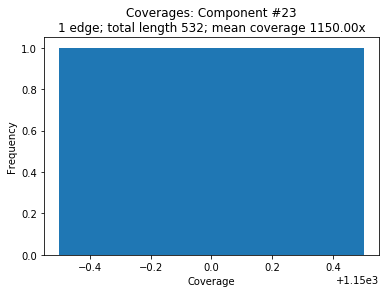

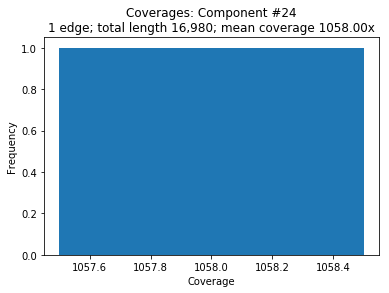

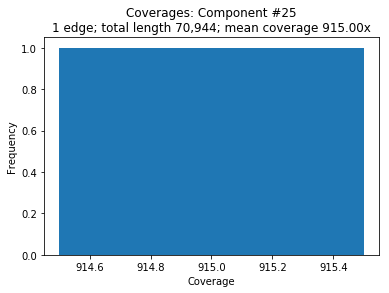

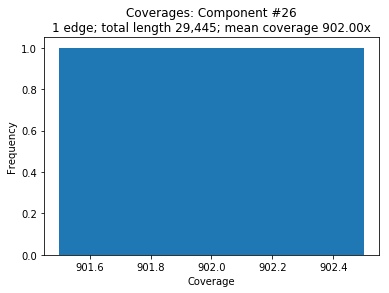

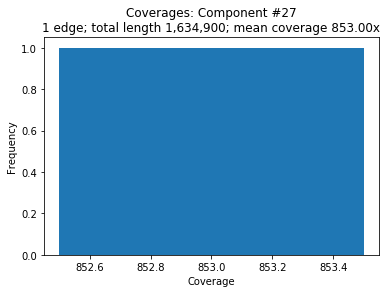

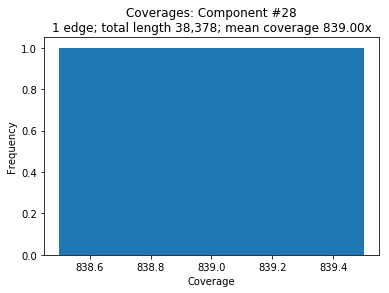

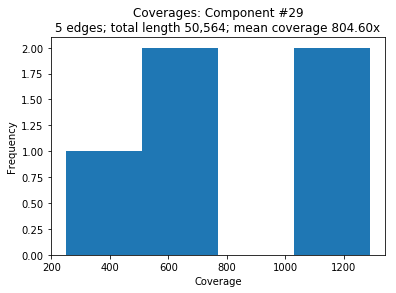

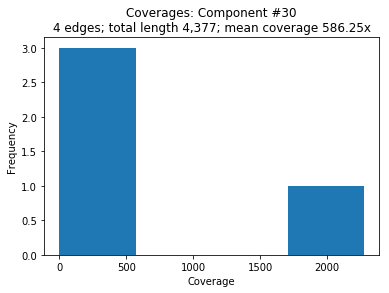

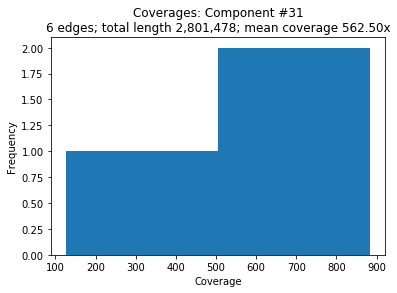

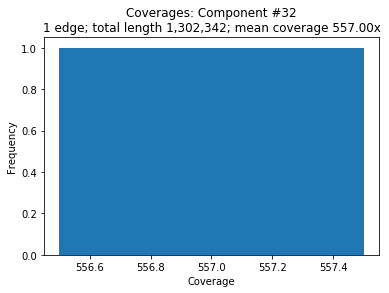

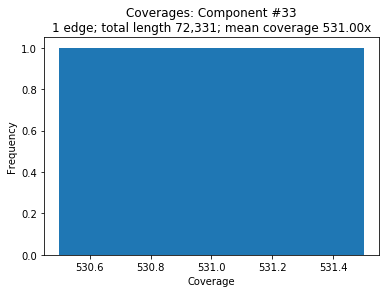

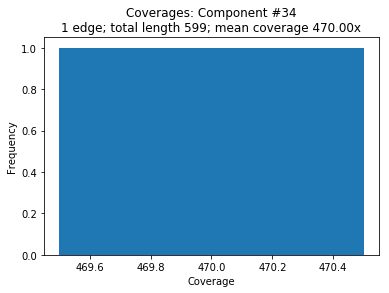

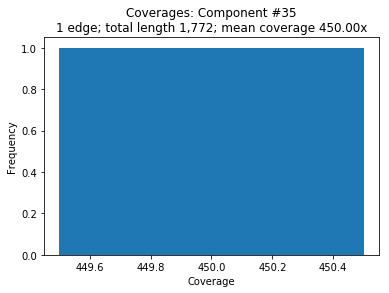

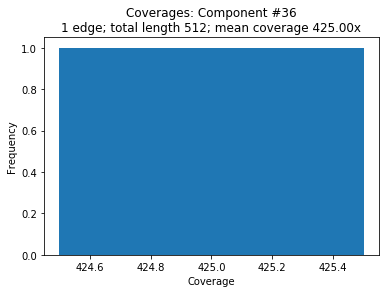

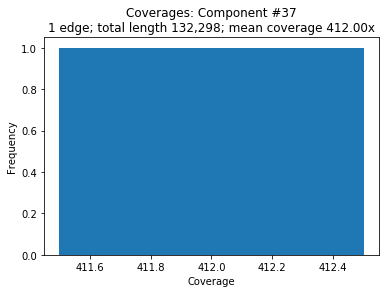

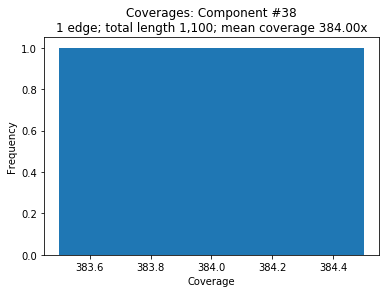

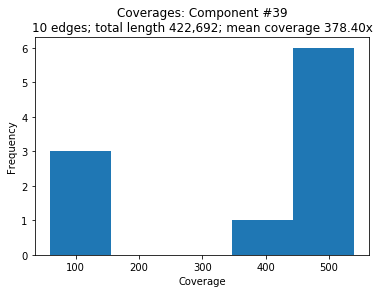

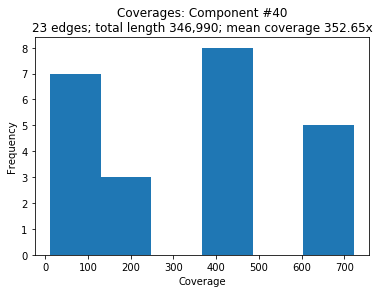

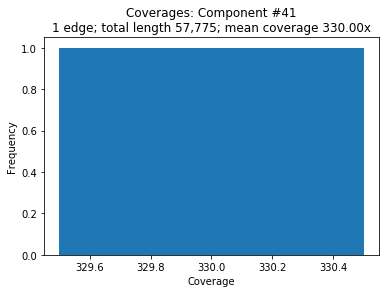

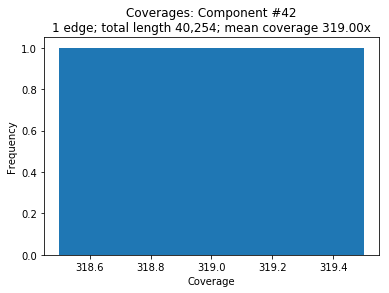

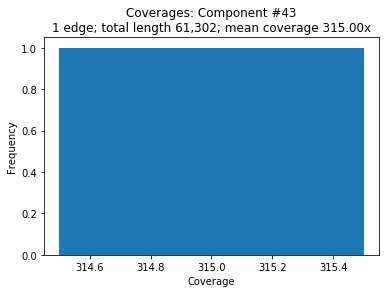

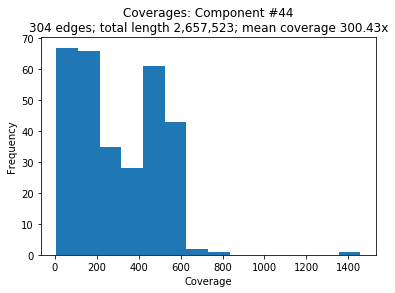

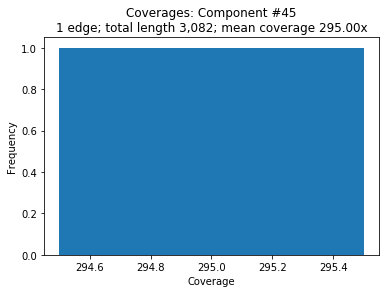

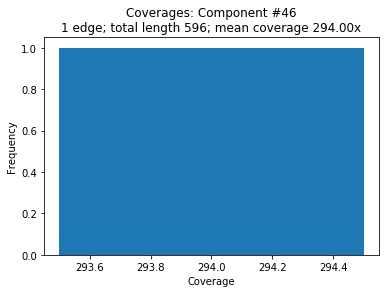

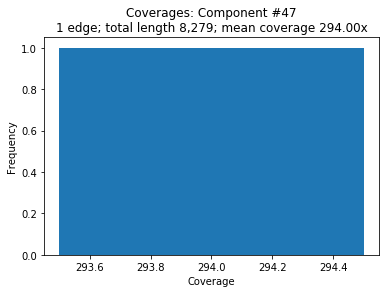

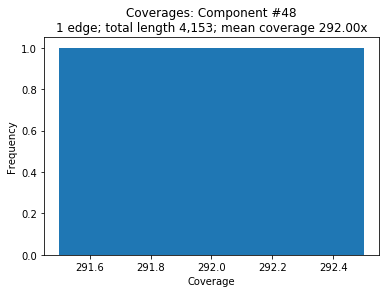

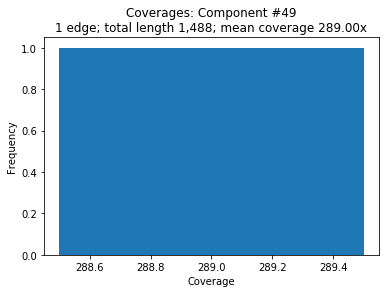

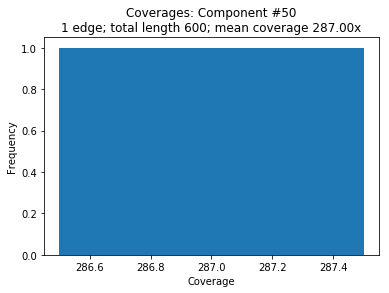

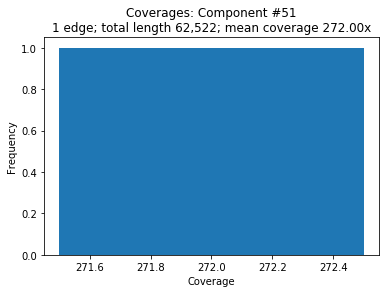

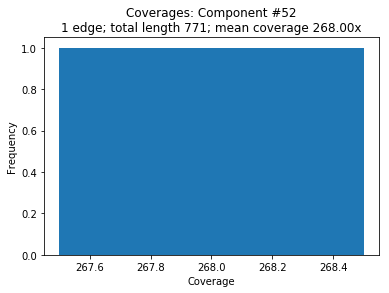

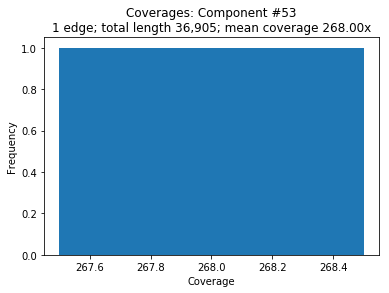

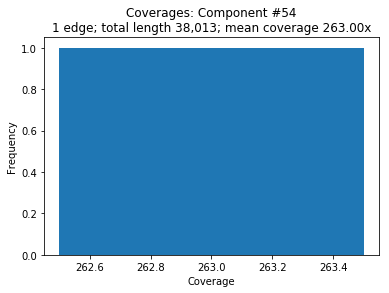

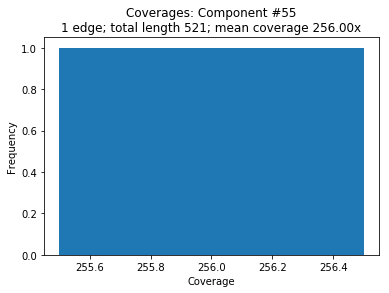

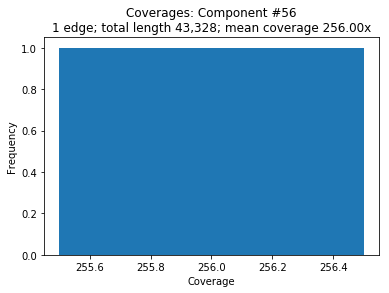

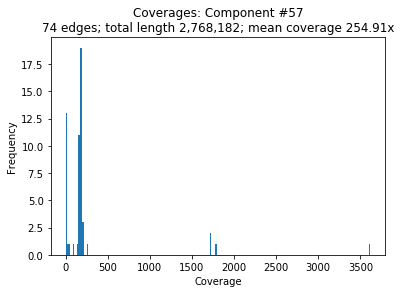

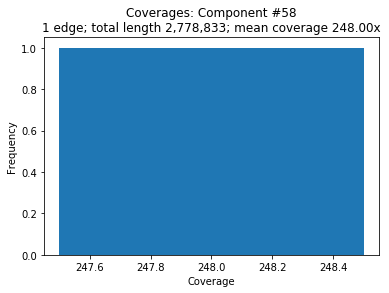

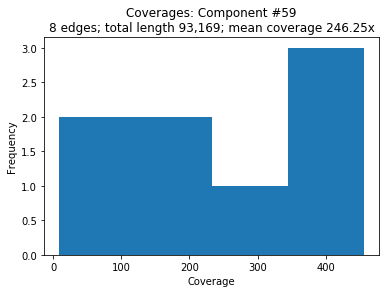

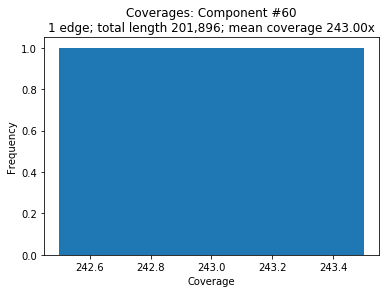

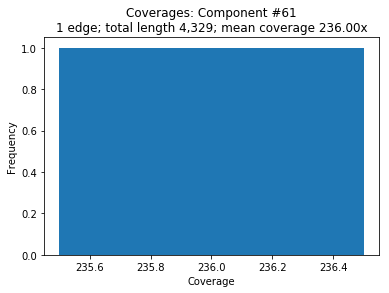

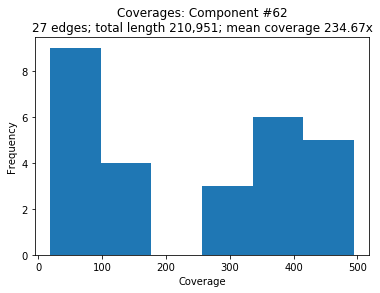

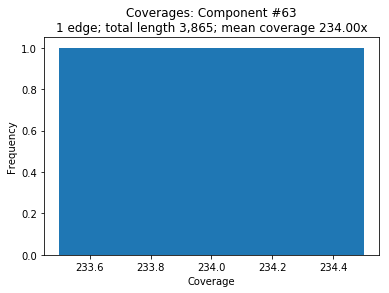

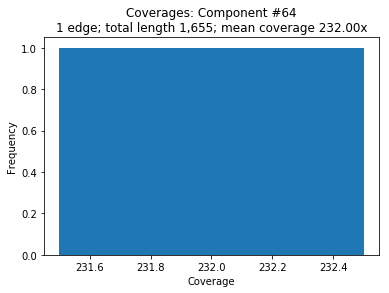

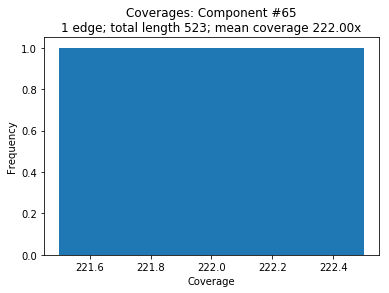

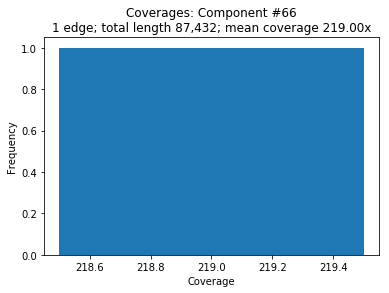

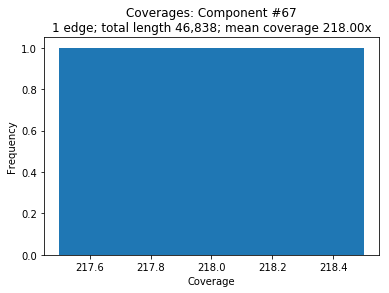

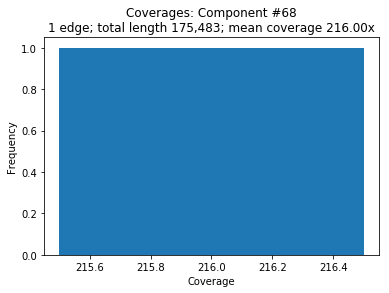

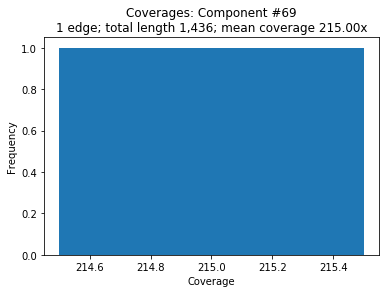

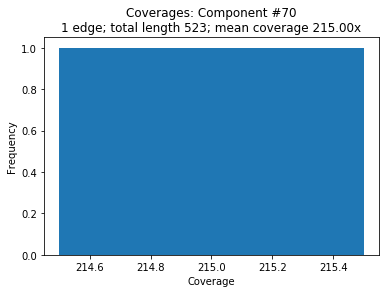

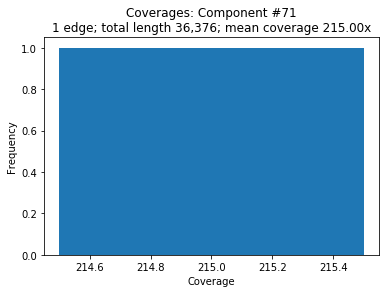

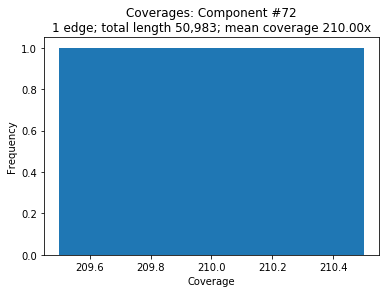

In [25]:
%matplotlib inline
import math

N = 72

for i in range(N):
    noun = "edge" if len(cmp2cov[i]) == 1 else "edges"
    title = "Coverages: Component #{}\n{:,} {}; total length {:,}; mean coverage {:.2f}x".format(
        i + 1, len(cmp2cov[i]), noun, cmp2totalLen[i], cmp2meanCov[i]
    )
    pyplot.hist(x=cmp2cov[i], bins="auto")
        
    pyplot.xlabel("Coverage")
    pyplot.ylabel("Frequency")
    pyplot.title(title)
    pyplot.show()

## How many of the top $N$ components contain just 1 edge?

In [26]:
num_1_edge_cmps = 0
for i in range(N):
    if len(cmp2cov[i]) == 1:
        num_1_edge_cmps += 1
print("{} of the top {} components have just 1 edge.".format(num_1_edge_cmps, N))

59 of the top 72 components have just 1 edge.


## For all components, plot number of edges vs. mean coverage

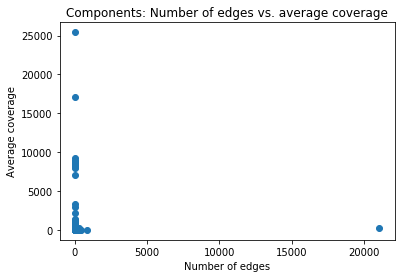

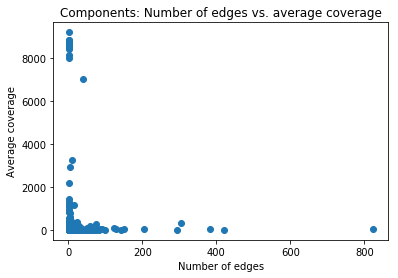

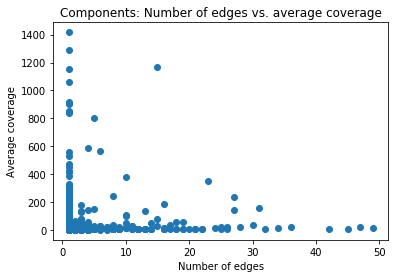

In [30]:
for cutoffs in [ [float("inf"), float("inf")], [1000, 10000], [50, 2000] ]:
    num_edges = []
    mean_cov = []
    for i, cmp in enumerate(sorted_components):
        ne = len(cmp)
        mc = cmp2meanCov[i]
        if ne < cutoffs[0] and mc < cutoffs[1]:
            num_edges.append(ne)
            mean_cov.append(mc)

    pyplot.scatter(x=num_edges, y=mean_cov)
    pyplot.title("Components: Number of edges vs. average coverage")
    pyplot.xlabel("Number of edges")
    pyplot.ylabel("Average coverage")
    pyplot.show()